# STAT 207 Homework 8 [50 points]

## Hypothesis Testing and Difference Parameters

Due: Friday, March 24 by noon (11:59 am) CST

<hr>

**Note:** For this assignment, you should not use any built-in functions for calculating confidence intervals or performing hypothesis tests.  You will not earn credit if you use the built-in confidence interval or hypothesis test functions on this assignment.  You may use other functions that we have discussed in class so far, including the mean, standard deviation, and sample functions.

## Package Imports [1 point]

Add code to the cell below to import packages needed for this assignment.

You may also need to read in additional packages later.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, t

## <u>Case Study 1</u>: Colleges and Universities (continued)

In Homework 7, you completed Case Study 2 about colleges and universities.  In this Homework, we will return to the same data to complete additional inference procedures.

We will use a random sample of post-secondary education facilities (colleges & universities) from the United States, including Puerto Rico & other US territories.  The **colleges.csv** file contains a random sample of 135 post-secondary education facilities from the US.  This data originally came from https://www.kaggle.com/yamqwe/colleges-and-universitiese, although the data is no longer accessible through the web.

We will use three variables in particular for this assignment:

- the number of students enrolled full-time (`FT_ENROLL`)
- the number of students enrolled part-time (`PT_ENROLL`)
- the number of people employeed by the school (`TOT_EMPLOY`)

## 1. Read in the data [2 points]

Below, you should read in the data from the **colleges.csv** file, perform any cleaning that needs to take place, and create the following variable:

- the variable `majority_pt`, a logical (Boolean) variable that indicates if the college or university has more students enrolled part-time than full-time (using `FT_ENROLL` and `PT_ENROLL`)

**Hint:** For the data cleaning, you may follow the process from Homework 7.  Check the Homework 7 solutions for an example of how to clean the data based on reasonable values for the `TOT_ENROLL` variable.

In [2]:
df = pd.read_csv('colleges.csv')
df.shape

(135, 47)

In [3]:
df = df[df.TOT_ENROLL > 0]
df.shape

(128, 47)

In [4]:
df['majority_pt'] = df.PT_ENROLL > df.FT_ENROLL
df.head()

,Unnamed: 0,X,Y,FID,IPEDSID,NAME,ADDRESS,ADDRESS2,CITY,STATE,...,SIZE_SET,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,HOUSING,DORM_CAP,TOT_EMPLOY,SHELTER_ID,majority_pt
0,3003,-73.490213,40.759564,5268,189459,Briarcliffe College,1055 Stewart Ave,NOT AVAILABLE,Bethpage,NY,...,9,2,440,1226,1666,2,0,356,NOT AVAILABLE,False
1,2832,-78.332293,35.501418,5097,198774,Johnston Community College,245 College Road,NOT AVAILABLE,Smithfield,NC,...,3,2,2141,2075,4216,2,0,697,NOT AVAILABLE,True
2,3811,-101.891915,33.589284,1076,229337,Texas Tech University Health Sciences Center,3601 4th Street,NOT AVAILABLE,Lubbock,TX,...,-2,2,916,3475,4391,2,0,5574,NOT AVAILABLE,False
3,5143,-85.196213,34.258192,4408,140988,Shorter University,315 Shorter Ave,NOT AVAILABLE,Rome,GA,...,11,2,130,1378,1508,1,668,319,NOT AVAILABLE,False
5,204,-104.831950,39.676030,7204,460738,American Sentinel University,2260 South Xanadu Way,NOT AVAILABLE,Aurora,CO,...,-3,2,3074,333,3407,2,0,91,NOT AVAILABLE,True


## 2. What Population Does a College Serve? [10 points] (Hypothesis test for proportion)

The University of Illinois reports that approximately 15% of students enrolled part-time.  

A university diversity officer would like to see if that 15% is also a reasonable value for a different characteristic of colleges and universities: the proportion of colleges that serve a majority of part-time students (as opposed to full-time students).

**a)**  Write out our hypotheses to test in this question.  Be sure to use appropriate notation, and define our parameter of interest.

$H_0:$ The proportion of colleges that serve a majority of part-time students = 15% $(p = 15\%)$

$H_a:$ The proportion of colleges that serve a majority of part-time students is not 15% $(p \neq 15\%)$ 

Parameter of interest(p): the proportion of all colleges that serve a majority of part-time students.

**b)** Check whether the conditions are met for our hypothesis test to be valid.  (No need to state each condition, but you may if it helps you.)

**Note:** you may continue your analysis as if these conditions were met, even if they are not.

In [5]:
n_sample = 128
p_0 = 0.15
se = np.sqrt(p_0 * (1 - p_0) / n_sample )
print("sample size:", n_sample, "\np_0:", p_0, "\nSE:", se)

sample size: 128 
p_0: 0.15 
SE: 0.031560952932381495


In [6]:
n_sample * p_0

19.2

In [7]:
n_sample * (1 - p_0)

108.8

1. We have a random sample of colleges and universities. (told in the background)
2. n is less than 10% of N, the number of colleges in the US is more than 1280
4. We have a large enough sample size for a Normal approximation of the sampling distribution. 
    - $np_0 \ge 10$
    - $n(1 - p_0) \ge 10$
**Must use $p_0$ instead of sample proportion.**

**c)** Calculate the test statistic and corresponding *p*-value for this test.

Formula of calculaitng test statistics:
$z = \frac{\hat{p} - p_0}{SE} = \frac{\hat{p} - p_0}{\sqrt{p_0(1-p_0)/n}}$

In [8]:
# 计算sample proportion
p_hat = df.majority_pt.mean()
p_hat

0.203125

In [9]:
# 计算test_statistics
test_statistic = np.abs(p_hat - p_0) / se
print("test statistic:",test_statistic)

test statistic: 1.6832508230603465


In [10]:
# 计算p-value, two-tailed, 记得 *2
p_value = 2 * (1 - norm.cdf(test_statistic))
print("p-value", p_value)

p-value 0.09232654595631029


**d)** Based on your hypothesis test results, what **decision** would you make about our hypotheses at a significance level of $0.10$?

P-value is 0.09232654595631029, which is less than 0.10.

So, we reject our null hypothesis. 

The proportion of colleges that serve a majority of part-time students $\ne$ 15%

**e)**  Which of the following statements is correct about what our significance level represents?

- Statement 1: The significance level is the probability that the null hypothesis is true.
- Statement 2: The significance level is the probability of getting a test statistic as extreme or more extreme than observed, assuming the null hypothesis is true.
- Statement 3: The significance level is the proportion of experiments that we would reject the null hypothesis when the null hypothesis is true.
- Statement 4: The significance level is the proportion of times that the alternative hypothesis is true.

**Replace the X with a number below.**

Statement 3 is correct.
Note that statement 2 is definition of p-value.

## 3. College and University Employees [12 points] (Hypothesis test for mean)

Because many colleges are small, I believe that the average number of employees of all post-secondary educational facilities (schools) will be less than 481 people.  I want to make a decision about this claim using data.  Help me to perform an appropriate hypothesis test to test my theories.

For this question, I'll use a significance level of $\alpha = 0.01$.

**a)** Write out your hypotheses.  Be sure to use appropriate notation and to define the parameter of interest.

$H_0:$ Average number of employees of all post-secondary educaitonal facilities is 481 $(\mu = 481)$.

$H_a:$ Average number of employees of all post-secondary educaitonal facilities is less than 481 $(\mu < 481)$.

Paremeter of interst$(\mu)$: the population mean of employees of all schools

**b)** State & check the necessary assumptions for the hypothesis test to be valid.  

1. We have a random sample of colleges and universities. (told in the background)
2. n(128) < 10% of N (by google search, the number of colleges in the US is more than 1280)
3. sample size n > 30, so normality is met.

<AxesSubplot: >

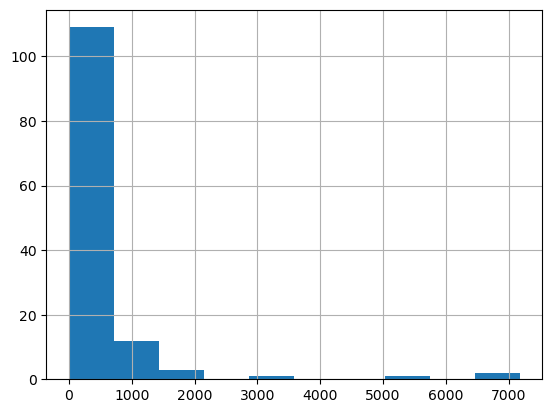

In [11]:
df.TOT_EMPLOY.hist()

**c)** Calculate the test statistic and corresponding *p*-value based on the provided sample of colleges.

In [12]:
n_sample = 128
mean_sample = df.TOT_EMPLOY.mean()
std_sample = df.TOT_EMPLOY.std()
se = std_sample / np.sqrt(n_sample)
print("sample mean:", mean_sample)
print("sample std:", std_sample)
print("sample size:", n_sample)

sample mean: 438.2890625
sample std: 1055.30537545773
sample size: 128


In [13]:
# 计算test statistics
test_statistic = (mean_sample - 481) / se
print("test statistics:", test_statistic)

test statistics: -0.4578950395128658


In [14]:
# 计算p-value, 因为不知道population std， 所以使用t distribution
p_value = t.cdf(test_statistic, df = n_sample - 1)
print("p-value:", p_value)

p-value: 0.3239051588757881


**d)** Based on the evidence calculated so far, what can you say about our theory of interest?  Be sure to give a complete conclusion in the context of the problem.

We fail to reject our null hypothesis, since p-value is 0.324 > 0.01.

Therefore, I do not have sufficient evidence to convince the skeptics who believe that the mean number of employees is less than 481.

**e)** Interpret the *p*-value.  That is, explain what the specific *p*-value that you calculated means.

The probability of the sample mean goes less than 481(what we assued to be true in null hypothesis) is about 0.324.

The specific, formal interpretation of the p‑value is: If the population mean number of employees for the
population of all post‑secondary schools really is 481 (the null hypothesis is true), I would expect to have a
sample of 128 schools with a sample mean of what I observed from this sample (438) or less in about
32.4% of my possible samples.

<hr>

## <u>Case Study 2</u>: U.S. County Unemployment Rate and Metropolitan Areas

In this case study, we will explore the statistical concepts that we've learned this week while also exploring the relationship between the **unemployment rate** of U.S. counties and whether the county is a **metropolitan area** or not. In this analysis, our cleaned U.S. counties dataset will serve as our population of all U.S. counties.  Other than those counties that have been removed, this dataset is in fact the population of U.S. coutnies.  While we usually do not have the whole population at our disposal when we conduct inference, we will use this population to "check" our answers so we can gain a deeper understanding of what is going on "behind the scenes" when we conduct inference on a population parameter.

## 4. Read and prepare the data [3 points] 

We will be analyzing just the **unemployment_rate** and **metro** variables from the **county.csv** dataframe.

1. Read the county.csv into a dataframe, call it df, and display the first five rows.
 - *This dataset has missing values! Specifically, the phrase 'data unavailable' represents missing values in this csv. Make sure you encode these values as NaN when you read the data in.*
2. Create a pandas dataframe that is comprised of just the **unemployment_rate** and the **metro** columns. Then drop all rows in this dataframe that have missing values.

In [15]:
df = pd.read_csv("county.csv", na_values = ["data unavailable"])

In [16]:
df.head()

,name,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,per_capita_income,median_hh_income,smoking_ban
0,Autauga County,Alabama,43671.0,54571,55504.0,1.48,13.7,77.5,7.2,3.86,yes,some_college,27841.70,55317.0,none
1,Baldwin County,Alabama,140415.0,182265,212628.0,9.19,11.8,76.7,22.6,3.99,yes,some_college,27779.85,52562.0,none
2,Barbour County,Alabama,29038.0,27457,25270.0,-6.22,27.2,68.0,11.1,5.90,no,hs_diploma,17891.73,33368.0,partial
3,Bibb County,Alabama,20826.0,22915,22668.0,0.73,15.2,82.9,6.6,4.39,yes,hs_diploma,20572.05,43404.0,none
4,Blount County,Alabama,51024.0,57322,58013.0,0.68,15.6,82.0,3.7,4.02,yes,hs_diploma,21367.39,47412.0,none


In [16]:
df = pd.read_csv("county.csv", na_values = ["data unavailable"])[['unemployment_rate', 'metro']].dropna()

In [17]:
df.shape

(3139, 2)

In [18]:
df.head()

,unemployment_rate,metro
0,3.86,yes
1,3.99,yes
2,5.90,no
3,4.39,yes
4,4.02,yes


## 5. Parameter Information [8 points]

In this analysis, we will consider two populations:

- the population of counties that are metropolitan areas, and
- the population of counties that are not metropolitan areas

**a)** First, create two dataframes:
* one that is comprised of the unemployment rates of all metropolitan counties, and 
* one that is comprised of the unemployment rates of all non-metropolitan counties.

In [19]:
df_metro = df[df.metro == 'yes']
df_metro.shape

(1165, 2)

In [20]:
df_not_metro = df[df.metro == 'no']
df_not_metro.shape

(1974, 2)

**b)** Next, we will calculate two relevant parameters for each population.  For each of these two populations, calculate the population mean unemployment rate and the population standard deviation unemployment rate.

In [21]:
metro_pop_mean = df_metro.unemployment_rate.mean()
metro_pop_mean

4.397957081545064

In [22]:
not_metro_pop_mean = df_not_metro.unemployment_rate.mean()
not_metro_pop_mean

4.737436676798379

In [23]:
metro_pop_std = df_metro.unemployment_rate.std()
metro_pop_std

1.2991800671784013

In [24]:
not_metro_pop_std = df_not_metro.unemployment_rate.std()
not_metro_pop_std

1.8124518106510843

**c)** What is the difference between the population mean unemployment rate of metropolitan counties and the population mean unemployment rate of non-metropolitan counties (ie. $\mu_{metro}-\mu_{nonmetro}$)? 

Is this a statistic or a parameter?

In [25]:
mu_diff = metro_pop_mean - not_metro_pop_mean
mu_diff

-0.33947959525331495

Answer to statistic or parameter: **Parameter**

**d)** Plot a histogram of distribution of unemployment rates for each of the two types of counties (whether in a metropolitan area or not).  Describe the **shape** for each distribution.

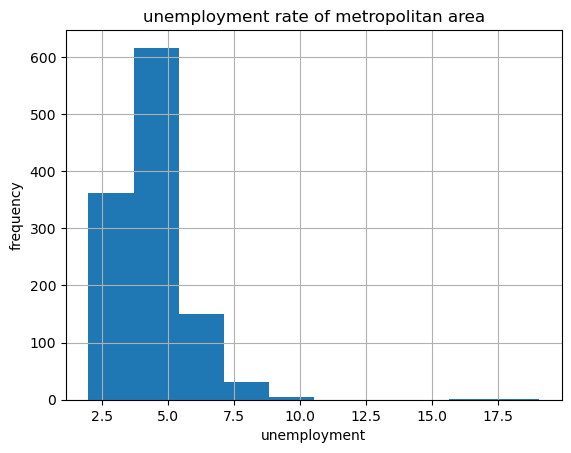

In [26]:
df_metro.unemployment_rate.hist()
plt.title("unemployment rate of metropolitan area")
plt.xlabel("unemployment")
plt.ylabel("frequency")
plt.show()

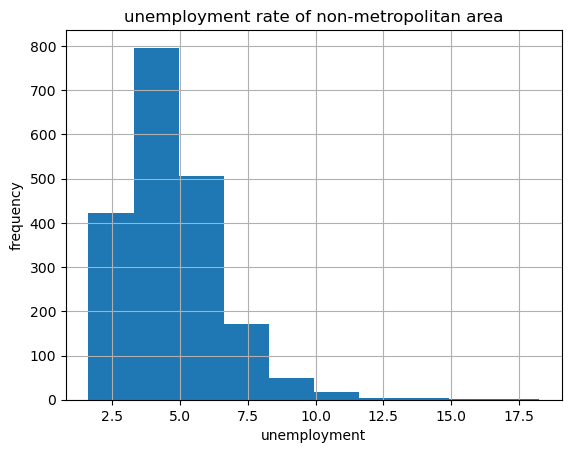

In [27]:
df_not_metro.unemployment_rate.hist()
plt.title("unemployment rate of non-metropolitan area")
plt.xlabel("unemployment")
plt.ylabel("frequency")
plt.show()

metro unemployment: unimodel and right skewed

non-metro unemployment: unimodel and right skewed

## 6. Sampling Distribution for Difference of Means [14 points]

First, *suppose* we were to create a sampling distribution of sample mean unemployment rate differences (ie. a distribution of values of $\bar{x}_{metro}-\bar{x}_{nonmetro}$, where $\bar{x}_{metro}$ is the mean of a random sample of $n_1=50$ metropolitan counties and $\bar{x}_{nonmetro}$ is the mean of a random sample of $n_2=50$ non-metropolitan counties).

**a)**  What would you *expect* the mean and standard deviation of this sampling distribution to be?

The formula for expecting mu:
$E(\bar{X_1} - \bar{X_2}) = E(\bar{X_1}) - E(\bar{X_2})$

The formula for SD:
$SD(\bar{X_1} - \bar{X_2}) = \sqrt{Var(X_1) + Var(X_2)} = \sqrt{(\frac{\sigma_1}{\sqrt{n_1}})^2 + (\frac{\sigma_2}{\sqrt{n_2}})^2} = \sqrt{\frac{(\sigma_1) ^ 2}{n_1} + (\frac{(\sigma_2)^2}{n_1}}$

In [28]:
sampling_mean = metro_pop_mean - not_metro_pop_mean
sampling_mean

-0.33947959525331495

In [29]:
sampling_std = np.sqrt( metro_pop_std**2 / 50 + not_metro_pop_std ** 2 / 50)
sampling_std

0.3153680520561989

Mean: -0.33947959525331495

Std:  0.3153680520561989

**b)** Would this sampling distribution of differences of sample means be approximately normal? Explain.

Yes, due to the following checks:
1. sample 1 is randomly selected
2. n1 < 10% N1 (500 < 1165)
3. sample 2 is randomly selected
4. n2 < 10% N2 (500 < 1974)
5. n1 > 30
6. n2 > 30
7. We have independent samples.

**c)**  Now, we would check your *expectations* in parts **a** and **b** above by *actually* creating a sampling distribution of differences of sample mean unemployment rates (i.e. a distribution of values of $\bar{x}_{metro}-\bar{x}_{nonmetro}$, where $\bar{x}_{metro}$ is the mean of a random sample of $n_1=50$ metropolitan counties and $\bar{x}_{nonmetro}$ is the mean of a random sample of $n_2=50$ non-metropolitan counties).

In the space below, create this sampling distribution with 1000 values of $\bar{x}_{metro}-\bar{x}_{nonmetro}$.

In [30]:
from scipy.stats import norm
sampling = norm.rvs(sampling_mean, sampling_std, 1000)

In [31]:
sampling

array([-1.07825056e-01, -6.05127642e-02, -5.44148718e-01,  5.47289088e-02,
        3.13891615e-01, -3.73453927e-01, -2.44108267e-01, -3.73710376e-01,
        3.38376117e-01, -4.15260803e-01, -1.03269003e+00, -2.41866387e-01,
       -6.85117441e-01, -4.81296664e-01, -5.35795011e-01, -5.57778727e-01,
        2.46548644e-03, -2.63926349e-01, -4.72286209e-01,  4.90247574e-01,
       -8.56390294e-01, -6.76739767e-01, -2.65651840e-01, -3.05719409e-01,
       -2.79548859e-01, -4.42368969e-01, -3.52192041e-01,  1.69344277e-01,
        3.84715187e-01, -2.54342235e-01, -3.59901857e-01, -5.93810908e-01,
       -1.00594007e-01, -8.70118410e-01,  4.09560004e-01,  1.04458812e-01,
       -5.03873972e-01, -1.37568675e-01, -4.18978841e-01, -1.23959396e+00,
       -5.92572816e-02, -2.23107533e-01, -6.41579404e-01,  7.39237958e-02,
       -4.44193701e-01, -1.98154799e-01, -7.96058725e-01, -6.24756953e-01,
       -8.40153875e-01, -5.08461475e-01, -2.77176398e-01, -2.17096774e-01,
       -6.36734455e-01, -

**d)**  Calculate the mean of the simulated sampling distribution we just created.  This is an *estimate* of the mean for the sampling distribution.  Compare this to the *theoretical* sampling distribution mean that you calculated in part **a**.

In [32]:
sampling.mean()

-0.3393530355726933

Sampling: -0.3497822926106574

Theoretical: -0.33947959525331495

Sampling and theoretical mean are quite close, sampling one is a little bit smaller.

**e)** Calculate the standard deviation of the simulated sampling distribution we just created.  This is an *estimate* of the standard deviation (or standard error) for the sampling distribution.  Compare this to the *theoretical* sampling distribution standard deviation that you calculated in part **a**.

In [33]:
sampling.std()

0.3237104141898477

sampling: 0.31409259602969547

theoretical: 0.3153680520561989

Sampling and theoretical std are quite close, sampling one is a little bit smaller.

**f)** Finally, plot a histogram of this sampling distribution that you just created. Make sure that you appropriately label the x-axis, the y-axis, and the title of this plot.  Describe the shape.

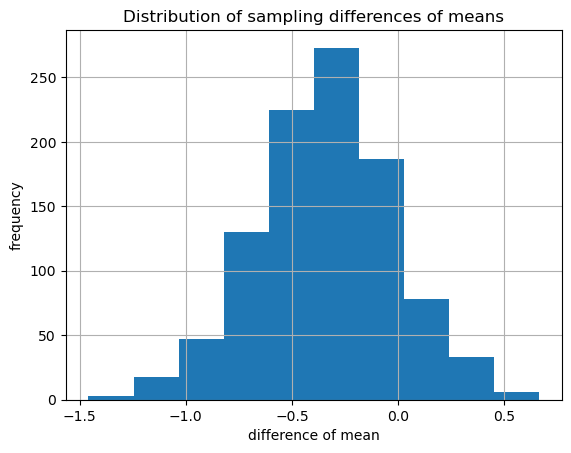

In [34]:
df_sampling = pd.DataFrame(sampling)
df_sampling[0].hist()
plt.title("Distribution of sampling differences of means")
plt.xlabel("difference of mean")
plt.ylabel('frequency')
plt.show()

The distribution is normally shaped.

With a center of mean of approximately -0.5.

Remember to keep all your cells and hit the save icon above periodically to checkpoint (save) your results on your local computer. Once you are satisified with your results restart the kernel and run all (Kernel -> Restart & Run All). **Make sure nothing has changed**. Checkpoint and exit (File -> Save and Checkpoint + File -> Close and Halt). Follow the instructions on the Homework 4 Canvas Assignment to submit your notebook to GitHub.